# Lasso Regresyon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
df = df.drop(["League","Division","NewLeague"], axis = 1).astype("float64")
df = pd.concat([df, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0


In [4]:
y = df["Salary"]
X = df.drop(["Salary"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
model = Lasso().fit(X_train, y_train)

* Bağımlı Değişken

In [5]:
model.intercept_

-5.587450677336733

* Bağımsız Değişkenler

In [6]:
model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [7]:
coefs = []
lasso = Lasso()
alphas = np.random.randint(0,1000,100)

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

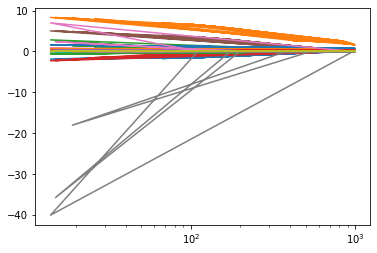

In [8]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log");

In [9]:
coefs = []
lasso = Lasso()
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

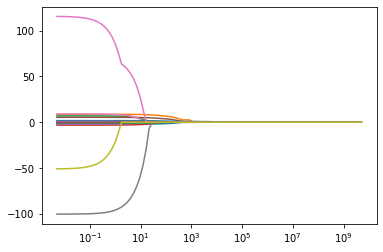

In [10]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

* Burada belli bir süreden sonra tüm kat sayılar sıfırlanıyor fakat **Ridge Regresyon**'da bu şekilde olmuyordu.

## Tahmin

In [11]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

* **R²** skoru modelin açıklanabilirliğini ifade etmektedir.
* Bağımsız değişkenlerin, bağımlı değişkendeki değişikliğin yüzde kaçını açıklayabilmektedir.

In [12]:
r2_score(y_test, y_pred)

0.4142279813236619

## Model Doğrulama (Model Tuning)

* Optimum lambda değerini bulmak için LassoCV fonksiyonunu kullanıyoruz.

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5
model_cv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)
model_cv.alpha_

201.85086292982749

In [14]:
model_cv_tuned = Lasso(alpha = model_cv.alpha_).fit(X_train, y_train)
y_pred = model_cv_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037446

* Katsayıları değişkenlerin isimleri ile bakıyoruz.
* Sıfır olanlar anlamsız değişken formuna dönüşmüştür.

In [15]:
pd.Series(model_cv_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64